In [996]:
# Importing libraries for Data Cleaning and EDA: 

import os
import numpy as np
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sbn
from fancyimpute import KNN
%matplotlib inline
mlt.rcParams["patch.force_edgecolor"] = True
sbn.set_style("whitegrid")
sbn.set(font_scale=1.3)

In [997]:
# Setting the working directory:
os.chdir("W:/DataScience/edWisor/Project")

In [998]:
# Loading the data into pandas dataframe:
df = pd.read_excel("Absenteeism_at_work_Project.xls")

In [999]:
# Checking the head of data frame:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


# Data Pre Processing:


In [1000]:
# Checking the dimensions & datatype information of data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 737 non-null float64
Month of absence                   739 non-null float64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             733 non-null float64
Distance from Residence to Work    737 non-null float64
Service time                       737 non-null float64
Age                                737 non-null float64
Work load Average/day              730 non-null float64
Hit target                         734 non-null float64
Disciplinary failure               734 non-null float64
Education                          730 non-null float64
Son                                734 non-null float64
Social drinker                     737 non-null float64
Social smoker                      736 non-null float64
Pet  

****
**Numerical Predictor Variables:** Transportation expense, Distance from Residence to Work, Service Time, Age, Work load Average/day, Hit target, Weight, Height, Body mass index

**Categorical Predictor Variables:** ID, Reason for absence, Month of absence, Day of the week, Seasons, Disciplinary failure, Education, Social drinker, Social smoker

****

In [1001]:
# List of numerical variables:
num_var = ["Transportation expense", "Distance from Residence to Work", "Service time", "Age", "Work load Average/day ","Hit target","Son","Pet","Weight","Height","Body mass index","Absenteeism time in hours"]

# List of categorical variables:
cat_var = ["ID","Reason for absence", "Month of absence", "Day of the week", "Seasons", "Disciplinary failure", "Education", "Social drinker", "Social smoker"]

***Missing Value Analysis:*** 

In [1002]:
# Checking for missing values in the data:

df.isnull().sum()

ID                                  0
Reason for absence                  3
Month of absence                    1
Day of the week                     0
Seasons                             0
Transportation expense              7
Distance from Residence to Work     3
Service time                        3
Age                                 3
Work load Average/day              10
Hit target                          6
Disciplinary failure                6
Education                          10
Son                                 6
Social drinker                      3
Social smoker                       4
Pet                                 2
Weight                              1
Height                             14
Body mass index                    31
Absenteeism time in hours          22
dtype: int64

In [1003]:
# Calcluating the missing value percentage and storing it in a dataframe:

mis_val = pd.DataFrame(df.isnull().sum()).reset_index()

# Renaming variables of mis_val dataframe:
mis_val.rename( columns = {"index":"variables",0: "mis_percent"}, inplace = True)

# Calculating the missing value percentage:
mis_val["mis_percent"] = (mis_val["mis_percent"]/len(df))*100

# Sorting in the descending order: 
mis_val = mis_val.sort_values(by="mis_percent", ascending= False).reset_index(drop=True)
mis_val

,variables,mis_percent
0,Body mass index,4.189189
1,Absenteeism time in hours,2.972973
2,Height,1.891892
3,Work load Average/day,1.351351
4,Education,1.351351
5,Transportation expense,0.945946
6,Son,0.810811
7,Disciplinary failure,0.810811
8,Hit target,0.810811
9,Social smoker,0.540541


In [1004]:
# Droping observation in which "Absenteeism time in hours" has missing value

df = df.drop(df[df['Absenteeism time in hours'].isnull()].index, axis=0)
df.shape

(718, 21)

In [1005]:
# Checking the unique values in categorical predictor variables:

for i in cat_var:
    print(df[i].value_counts())

3     111
28     75
34     54
22     46
11     40
20     39
15     37
36     32
24     28
14     28
33     24
10     22
1      22
17     20
5      18
18     15
13     14
25     10
6       8
9       8
12      7
27      6
30      6
7       6
2       6
23      6
29      5
26      5
32      5
31      3
19      3
21      3
16      2
8       2
35      1
4       1
Name: ID, dtype: int64
23.0    146
28.0    109
27.0     69
13.0     54
19.0     40
0.0      36
22.0     33
26.0     32
25.0     31
11.0     25
10.0     23
18.0     21
14.0     18
1.0      16
7.0      15
12.0      8
6.0       7
8.0       6
21.0      6
9.0       4
16.0      3
5.0       3
24.0      3
15.0      2
4.0       2
2.0       1
17.0      1
3.0       1
Name: Reason for absence, dtype: int64
3.0     84
2.0     72
10.0    66
7.0     65
5.0     62
11.0    59
6.0     53
4.0     53
8.0     52
1.0     50
9.0     50
12.0    48
0.0      3
Name: Month of absence, dtype: int64
2    159
4    151
3    149
6    136
5    123
Name: Day of the 

In "Reason of absence", the encoded category 20 is not there and 0 is there, so encoded value of 0 should be replaced with 20.

In [1006]:
# Replacing fluke values:
df["Reason for absence"] = df["Reason for absence"].replace(0,20)

**Imputation Methods:**

In [1007]:
# Apply KNN imputation algorithm:

df = pd.DataFrame(KNN(k=5).fit_transform(df), columns = df.columns)

Imputing row 1/718 with 0 missing, elapsed time: 0.140
Imputing row 101/718 with 1 missing, elapsed time: 0.144
Imputing row 201/718 with 0 missing, elapsed time: 0.144
Imputing row 301/718 with 0 missing, elapsed time: 0.148
Imputing row 401/718 with 0 missing, elapsed time: 0.148
Imputing row 501/718 with 1 missing, elapsed time: 0.148
Imputing row 601/718 with 0 missing, elapsed time: 0.148
Imputing row 701/718 with 0 missing, elapsed time: 0.148


In [1008]:
# Converting the variables in the proper datatype:

for i in cat_var:
    df[i] = df[i].round()
    df[i] = df[i].astype("category")
df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718 entries, 0 to 717
Data columns (total 21 columns):
ID                                 718 non-null category
Reason for absence                 718 non-null category
Month of absence                   718 non-null category
Day of the week                    718 non-null category
Seasons                            718 non-null category
Transportation expense             718 non-null float64
Distance from Residence to Work    718 non-null float64
Service time                       718 non-null float64
Age                                718 non-null float64
Work load Average/day              718 non-null float64
Hit target                         718 non-null float64
Disciplinary failure               718 non-null category
Education                          718 non-null category
Son                                718 non-null float64
Social drinker                     718 non-null category
Social smoker                      718 non-null

***Outlier Analysis:*** 

Checking for outliers in the numerical variables:

Using the Flooring and Capping method for outlier analysis.

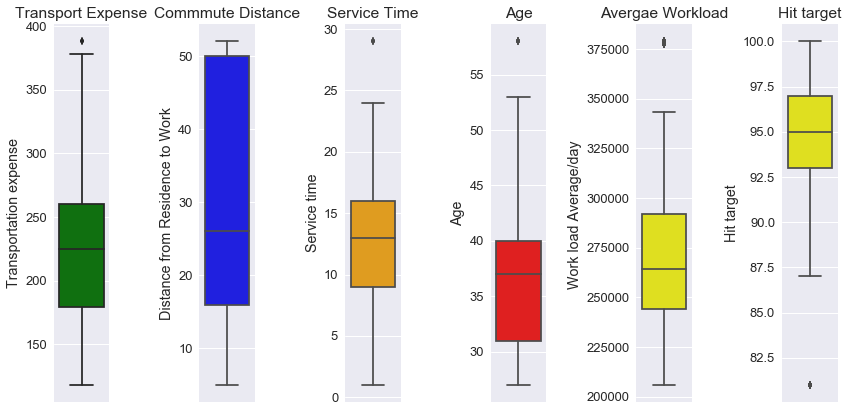

In [1009]:
# Making the figure and subplots for the boxplot visualisation:

fig, axes = plt.subplots(nrows=1, ncols=6,figsize=(12,6))

# Using Seaborn to create boxplots:

sbn.boxplot("Transportation expense", data=df, ax=axes[0], orient="v", color="green").set_title("Transport Expense")
sbn.boxplot("Distance from Residence to Work", data=df, ax=axes[1], orient="v", color="blue").set_title("Commmute Distance")
sbn.boxplot("Service time", data=df, ax=axes[2], orient="v", color="orange").set_title("Service Time")
sbn.boxplot("Age", data=df, ax=axes[3], orient="v", color="red").set_title("Age")
sbn.boxplot("Work load Average/day ", data=df, ax=axes[4], orient="v", color="yellow").set_title("Avergae Workload")
sbn.boxplot("Hit target", data=df, ax=axes[5], orient="v", color="yellow").set_title("Hit target")

# For better visibility of the labels:
plt.tight_layout()

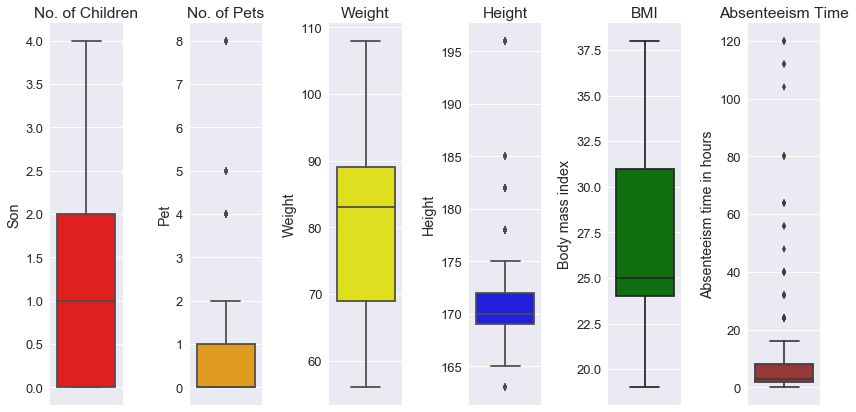

In [1010]:
fig,axes = plt.subplots(nrows=1, ncols= 6, figsize=(12,6))


sbn.boxplot("Son", data=df, ax=axes[0], orient="v", color="red").set_title("No. of Children")
sbn.boxplot("Pet", data=df, ax=axes[1], orient="v", color="orange").set_title("No. of Pets")
sbn.boxplot("Weight", data=df, ax=axes[2], orient="v", color="yellow").set_title("Weight")
sbn.boxplot("Height", data=df, ax=axes[3], orient="v", color="blue").set_title("Height")
sbn.boxplot("Body mass index", data=df, ax=axes[4], orient="v", color="green").set_title("BMI")
sbn.boxplot("Absenteeism time in hours", data=df, ax=axes[5], orient="v", color="brown").set_title("Absenteeism Time")


plt.tight_layout()

In [1011]:
# Using Flooring & Capping method to deal with Outliers:
for i in num_var:
    q75, q25 = np.percentile(df[i], [75,25])         # 75th and 25th Percentile
    iqr = q75 - q25                                  # Interquartile range

    upper_fence = q75 + (iqr*1.5)                    # Upper fence
    lower_fence = q25 - (iqr*1.5)                    # Lower fence
                        
    
    df.loc[df[i]>upper_fence, i] = upper_fence
    df.loc[df[i]<lower_fence, i] = lower_fence
    

***Visualisations for exploring relationships b/w the variables:***

C:\Users\Eesaan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Mean Absent Time v/s Reason for absence')

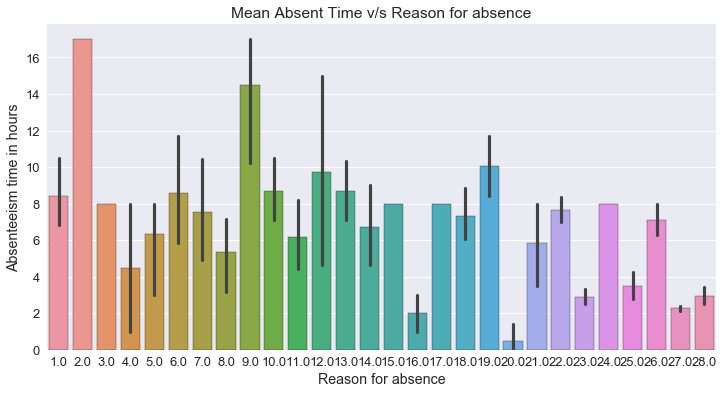

In [1012]:
# Barplot of Mean Absent Time v/s Reason for absence

plt.figure(figsize=(12,6))
sbn.barplot(x="Reason for absence", y="Absenteeism time in hours", data=df)
plt.title("Mean Absent Time v/s Reason for absence")

C:\Users\Eesaan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Mean Absent Time v/s Month of absence')

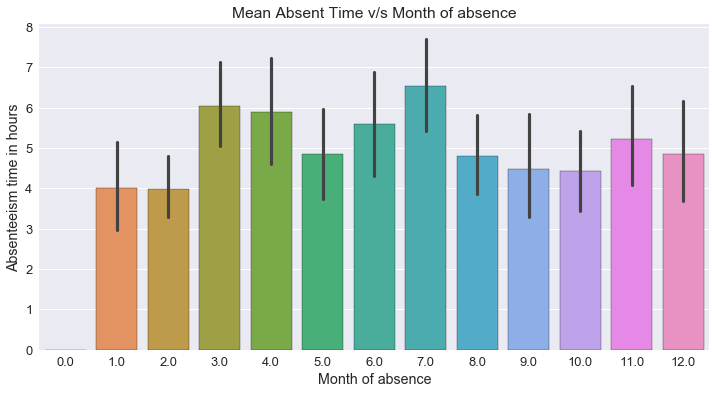

In [1013]:
# Barplot of Mean Absent Time v/s Month of absence

plt.figure(figsize=(12,6))
sbn.barplot(x="Month of absence", y="Absenteeism time in hours", data=df)
plt.title("Mean Absent Time v/s Month of absence")

C:\Users\Eesaan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Mean Absent Time v/s Day of the week ')

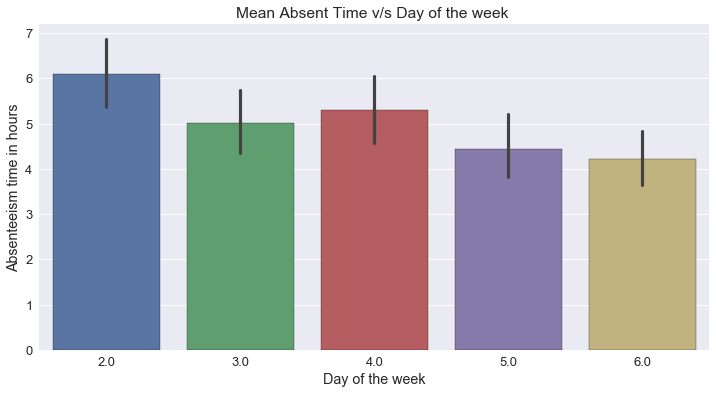

In [1014]:
# Barplot of Mean Absent Time v/s Day of the week   

plt.figure(figsize=(12,6))
sbn.barplot(x="Day of the week", y="Absenteeism time in hours", data=df)
plt.title("Mean Absent Time v/s Day of the week ")

C:\Users\Eesaan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Mean Absent Time v/s Seasons')

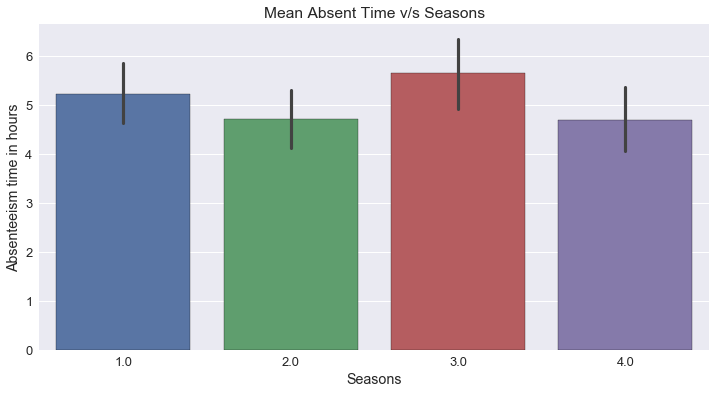

In [1015]:
# Barplot of Mean Absent Time v/s Seasons 

plt.figure(figsize=(12,6))
sbn.barplot(x="Seasons", y="Absenteeism time in hours", data=df)
plt.title("Mean Absent Time v/s Seasons")

C:\Users\Eesaan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Mean Absent Time v/s Disciplinary failure')

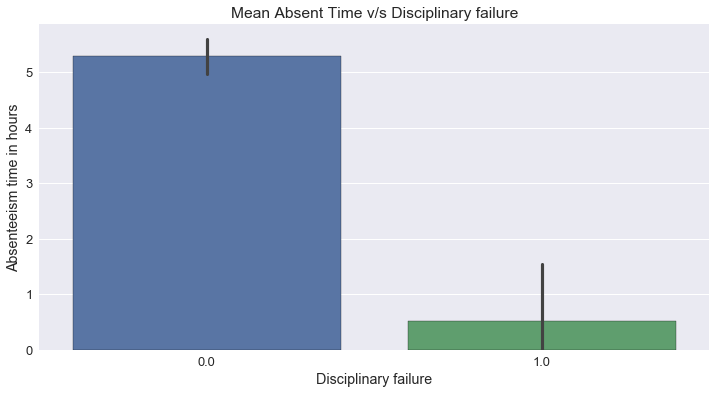

In [1016]:
# Barplot of Mean Absent Time v/s Disciplinary failure

plt.figure(figsize=(12,6))
sbn.barplot(x="Disciplinary failure", y="Absenteeism time in hours", data=df)
plt.title("Mean Absent Time v/s Disciplinary failure")

C:\Users\Eesaan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Mean Absent Time v/s Education')

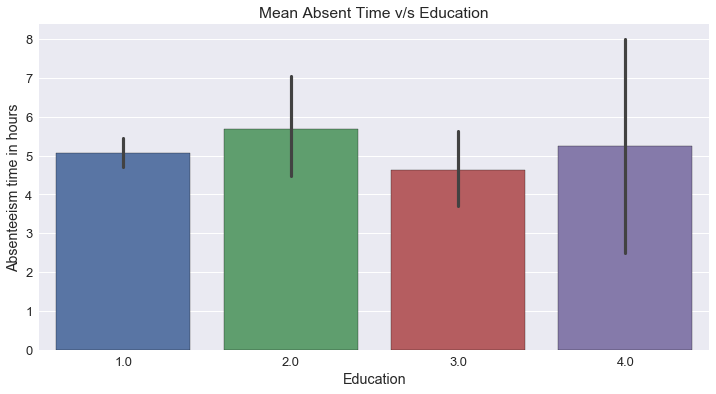

In [1017]:
# Barplot of Mean Absent Time v/s Education

plt.figure(figsize=(12,6))
sbn.barplot(x="Education", y="Absenteeism time in hours", data=df)
plt.title("Mean Absent Time v/s Education")

C:\Users\Eesaan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Mean Absent Time v/s Drinking')

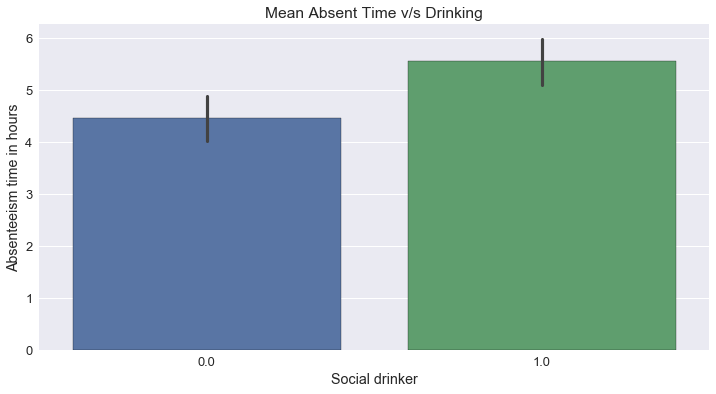

In [1018]:
# Barplot of Mean Absent Time v/s Social drinker

plt.figure(figsize=(12,6))
sbn.barplot(x="Social drinker", y="Absenteeism time in hours", data=df)
plt.title("Mean Absent Time v/s Drinking")

C:\Users\Eesaan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Mean Absent Time v/s Smoking')

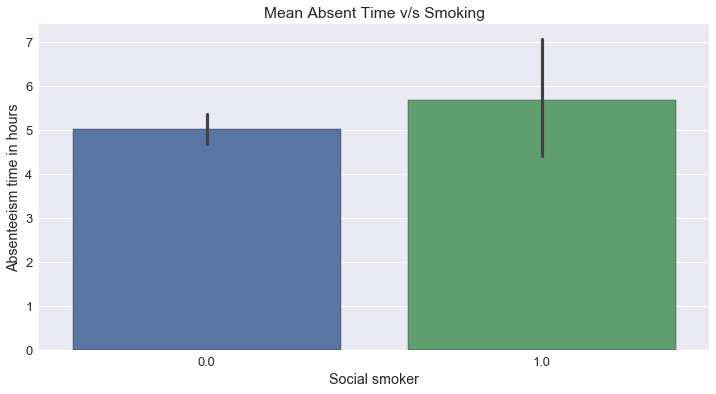

In [1019]:
# Barplot of Mean Absent Time v/s Social smoker

plt.figure(figsize=(12,6))
sbn.barplot(x="Social smoker", y="Absenteeism time in hours", data=df)
plt.title("Mean Absent Time v/s Smoking")

C:\Users\Eesaan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Mean Absent Time v/s ID')

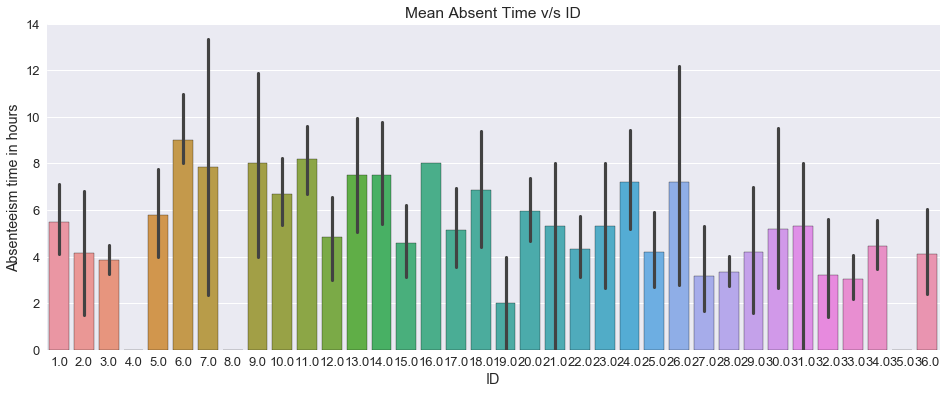

In [1020]:
# Barplot of Mean Absent Time v/s ID

plt.figure(figsize=(16,6))
sbn.barplot(x="ID", y="Absenteeism time in hours", data=df)
plt.title("Mean Absent Time v/s ID")

C:\Users\Eesaan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Absent Time Distribution')

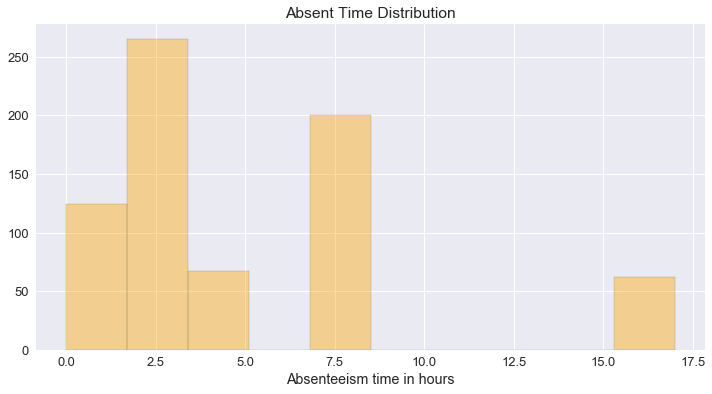

In [1021]:
# Distribution of Target variable:

plt.figure(figsize=(12,6))
sbn.distplot(df["Absenteeism time in hours"], bins=10, color="orange", kde=False)
plt.title("Absent Time Distribution")

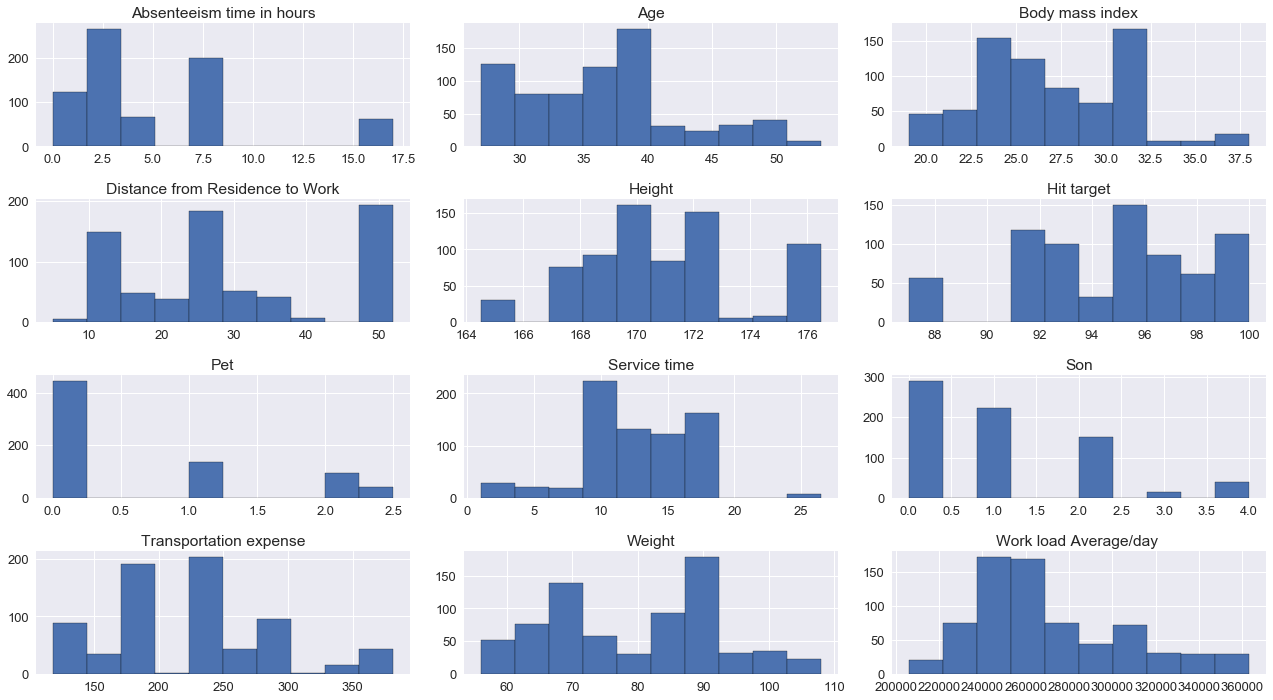

In [1022]:
# Distributions of numerical variables:

df.hist(figsize = (18,10))
plt.tight_layout()

***Feature Scaling:***

In [1023]:
# Normalisation method for scaling:

for i in num_var:
    if(i == "Absenteeism time in hours"):
        continue
    df[i] = (df[i] - df[i].min())/ (df[i].max() - df[i].min())

***Feature Selection:***

Text(0.5,1,'Correlation Heatmap')

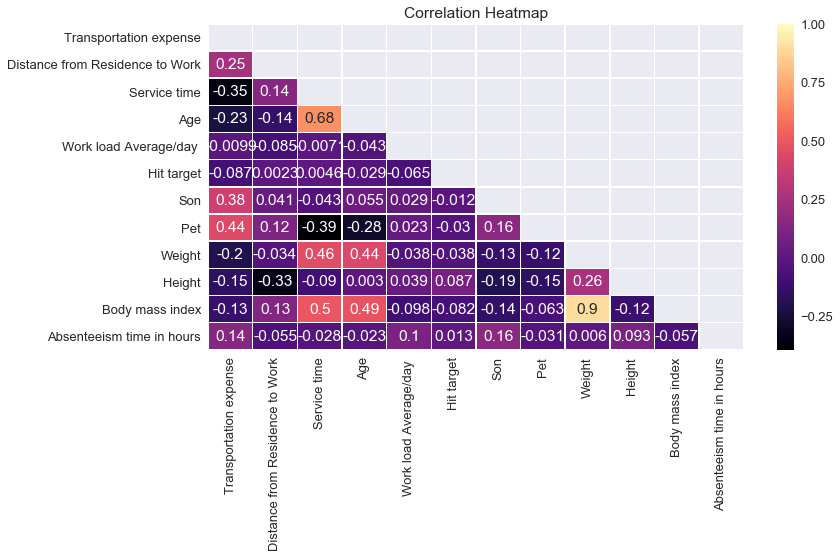

In [1024]:
# Correlation heatmap for numerical variables in the dataset:

plt.figure(figsize=(12,6))
mask = np.zeros_like(df[num_var].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sbn.heatmap(df[num_var].corr(), annot=True, mask=mask, cmap="magma", linewidths=.5, )
plt.title("Correlation Heatmap")


In [1025]:
# Dropping the column "weight" from the dataset:

df = df.drop(["Weight"], axis=1)

In [1026]:
# Making separate dataframes of dependent & independent variables:

X = df.drop("Absenteeism time in hours",axis=1)
y = df["Absenteeism time in hours"]

In [1027]:
# Creating dummy variables for the categorical variables:

X = pd.get_dummies(data= X, columns= cat_var, drop_first= True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718 entries, 0 to 717
Data columns (total 97 columns):
Transportation expense             718 non-null float64
Distance from Residence to Work    718 non-null float64
Service time                       718 non-null float64
Age                                718 non-null float64
Work load Average/day              718 non-null float64
Hit target                         718 non-null float64
Son                                718 non-null float64
Pet                                718 non-null float64
Height                             718 non-null float64
Body mass index                    718 non-null float64
ID_2.0                             718 non-null uint8
ID_3.0                             718 non-null uint8
ID_4.0                             718 non-null uint8
ID_5.0                             718 non-null uint8
ID_6.0                             718 non-null uint8
ID_7.0                             718 non-null uint8
ID_8.0     

*** Dimensionality Reduction using PCA: ***

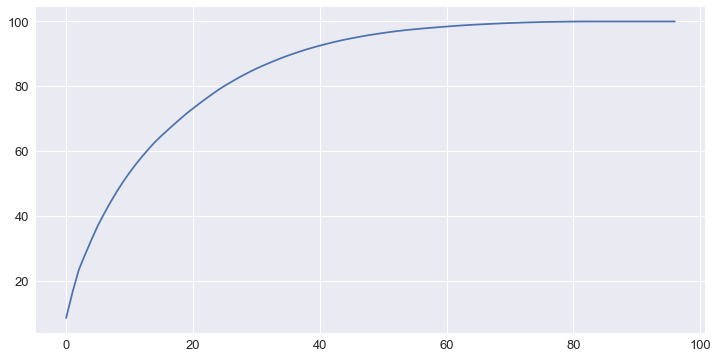

In [1028]:
# Plotting explained variance v/s No.of components:

pca = PCA(n_components= 97) 
pca.fit(X)
# Variance explained by each component:
var = pca.explained_variance_ratio_ 
# Cumulative variance explained by components:
var1 = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.figure(figsize = (12,6))
plt.plot(var1)


About 98% of the variance present in the data can be explained by 45 variables, therefore, keeping the n_components in PCA = 45

In [1029]:
# PCA Transformation of data:

pca = PCA(n_components= 45)
X = pca.fit_transform(X)

# Model Development:

In [1030]:
# Importing the required libraries:

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection, preprocessing
from sklearn import metrics


In [1031]:
# Splitting the data into training & testing set:

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state= 5)

*** Model Selection: ***

In [1032]:
# Creating Linear Model object:

lm = LinearRegression()

# Fitting the training data:

lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [1033]:
# Predicting the values for test data:

pred_lm = lm.predict(X_test)

In [1034]:
#Error Metrics:

print("Linear Regression: ")
print("The Mean Absoulte Error[MAE] is:", metrics.mean_absolute_error(y_test, pred_lm))
print("The Mean Squared Error[MSE] is:", metrics.mean_squared_error(y_test, pred_lm))

Linear Regression: 
The Mean Absoulte Error[MAE] is: 2.459648947751508
The Mean Squared Error[MSE] is: 13.525616891549129


In [1035]:
# Creating Decision Tree Regression Model object:

dt = DecisionTreeRegressor()

# Fitting the training data:

dt.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [1036]:
# Predicitng the values of test dataset:

pred_dt = dt.predict(X_test)

In [1037]:
# Error Metrics:

print("Decision Tree: ")
print("The Mean Absoulte Error[MAE] is:", metrics.mean_absolute_error(y_test, pred_dt))
print("The Mean Squared Error[MSE] is:\t", metrics.mean_squared_error(y_test, pred_dt))

Decision Tree: 
The Mean Absoulte Error[MAE] is: 3.533333333333333
The Mean Squared Error[MSE] is:	 31.022222222222222


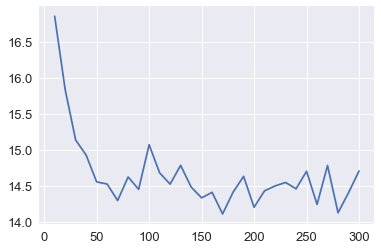

In [1038]:
# Random Forest Regression
# Using elbow method to determine the best value for "n_estimators"

error = []
k = np.linspace(10,300,30)
for i in k:
    rf_elbow = RandomForestRegressor(n_estimators= int(i))
    rf_elbow.fit(X_train,y_train)
    pred_elbow = rf_elbow.predict(X_test)
    mse = metrics.mean_squared_error(y_test, pred_elbow)
    error.append(mse)
plt.plot(k, error)

In [1039]:
# Getting the Optimum value for ntree parameter:
for i in range(0,len(k)):
    if(error[i]== np.array(error).min()):
        opt = k[i]    
   


rf = RandomForestRegressor(n_estimators= int(opt))

# Fitting the training data:

rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=170, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [1040]:
# Predicitng the values of test dataset:

pred_rf = rf.predict(X_test)

In [1041]:
# Error Metrics:

print("Random Forest Regression: ")
print("The Mean Absoulte Error[MAE] is:", metrics.mean_absolute_error(y_test, pred_rf))
print("The Mean Squared Error[MSE] is:\t", metrics.mean_squared_error(y_test, pred_rf))

Random Forest Regression: 
The Mean Absoulte Error[MAE] is: 2.6891977383546006
The Mean Squared Error[MSE] is:	 14.037212569677594


# Results:
Error Metrics of Linear Regression are the best out of all the tested models, so Linear Regression model is the selected model for Prediciton of Employee Absenteeism Time.

# Loss per month trend:

Using basic unitary method, loss per month can be formulated as:
Loss = ( Average work load/day * Absenteesim Time In Hours ) / Service Time 

Grouping the data by Month of absence variable and using the above formula, we can get monthly trend.